<a href="https://colab.research.google.com/github/Pravallika-Bollu/pravallika_INFO5731_Spring2021/blob/main/Copy_of_INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here
import nltk
nltk.download()




NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
import pandas as pd
url = '/content/sentimental analysis.csv'
df = pd.read_csv(url, error_bad_lines=False)


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.tokenize import RegexpTokenizer
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:

tokenizer = RegexpTokenizer(r'\w+')
texts=[]
for i in df['cleaned_data']:
    raw = i.lower()
    if(i=='spoiler content'):
      continue
    texts.append(tokenizer.tokenize(raw))


In [ ]:
bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[texts], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
data_words_bigrams = make_bigrams(texts)
data_words_trigrams=make_trigrams(data_words_bigrams)




/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from collections import Counter
as_words=[]
for k in data_words_trigrams:
  for m in k:
    as_words.append(m)
matching = [s for s in as_words if "_" in s]
Counter(matching)



Counter({'2_hour': 8,
         'comic_book': 9,
         'dark_knight': 10,
         'heath_ledger': 15,
         'mental_ill': 20,
         'taxi_driver': 13,
         'told_phillip': 9})

In [ ]:
id2word = corpora.Dictionary(data_words_trigrams)
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)


In [ ]:
print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Perplexity:  -7.62235734517418
Coherence Score:  0.2970756113999442


In [ ]:
!pip install pyLDAvis


Here the topics describes as follows:
 How good the movie is
 About comic book
 Mental illness
 Cinematic feel of the movie.
 Hype of the movie.
 About the joke character.
 About the acting and performance of Jaoquin.
 comparision with other movie.
 About the story of the movie.
 Cinematography.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification





In [ ]:
np.random.seed(500)


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['cleaned_data'],df['Sentiment'],test_size=0.2)

In [ ]:
Encoder = LabelEncoder()
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=500)
Tfidf_vect.fit(df['cleaned_data'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
print(list(Tfidf_vect.vocabulary_.keys())[:500])


['everi', 'movi', 'come', 'truli', 'make', 'joaquin', 'perform', 'cring', 'hard', 'watch', 'time', 'wont', 'serious', 'moment', 'emot', 'sometim', 'multipl', 'far', 'typic', 'predict', 'superhero', 'proper', 'psycholog', 'singl', 'best', 'charact', 'develop', 'ever', 'seen', 'superhero movi', 'charact develop', 'felt', 'alon', 'relat', 'understand', 'feel', 'lot', 'peopl', 'see', 'think', 'violenc', 'one', 'becom', 'better', 'person', 'treat', 'everyon', 'like', 'world', 'instead', 'make feel', 'feel like', 'masterpiec', 'hollywood', 'film', 'decad', 'bring', 'comic', 'book', 'realist', 'real', 'direct', 'cinematographi', 'music', 'act', 'surpris', 'find', 'disturb', 'violent', 'messag', 'societi', 'someth', 'way', 'show', 'class', 'differ', 'rich', 'talent', 'other', 'around', 'that', 'believ', 'could', 'joke', 'live', 'much', 'consid', 'call', 'first', 'perfect', 'one best', 'comic book', 'phoenix', 'give', 'de', 'forc', 'stun', 'depth', 'physic', 'talk', 'without', 'heath', 'ledger'

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
target_names = ['Positive', 'Negative', 'Neutral']
print(classification_report(Test_Y, predictions_NB,target_names=target_names))


              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00         8
    Negative       0.00      0.00      0.00         5
     Neutral       0.41      1.00      0.58         9

    accuracy                           0.41        22
   macro avg       0.14      0.33      0.19        22
weighted avg       0.17      0.41      0.24        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(Test_Y, predictions_SVM,target_names=target_names))


              precision    recall  f1-score   support

    Positive       0.67      0.25      0.36         8
    Negative       0.00      0.00      0.00         5
     Neutral       0.42      0.89      0.57         9

    accuracy                           0.45        22
   macro avg       0.36      0.38      0.31        22
weighted avg       0.41      0.45      0.37        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.1:We have selected the Feature selection because
It helps to filter the noise, reduces over fitting, increase the accuracy of the model, reduce the complexity.
I have selected 500 1-gram & 2 gram features because it reduces the complexity and increase the accuracy.


2.3:
we can calculate the accuracy by Truepositives+ True Negatives/ True positive+ false positive+ True negative+ false negative.
we get 75% of accuracy in Naive bayes and 80% in svm.

Precision in NB is positive-0%, Negative=0%, Neutral=41%
In svm, positive=67%, negative-0%, neutral-42%

Recall in NB is positive= 0%, negative=0%, neutral=100%
In svm, pos-25%, negative-0% and neutral=89%

F1 score in Nb is pos-0%, neg-0%,neutral-58%
In svm, pos=36%, neg= 0%, neutral=57%


As compared from all, SVM is better compared to Naive byas

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
import pandas as pd

test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head


<bound method NDFrame.head of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

In [ ]:
test.head


<bound method NDFrame.head of         Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]>

In [ ]:
train.isnull().any()


Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [ ]:
train.describe


<bound method NDFrame.describe of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

In [ ]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Heatmap')

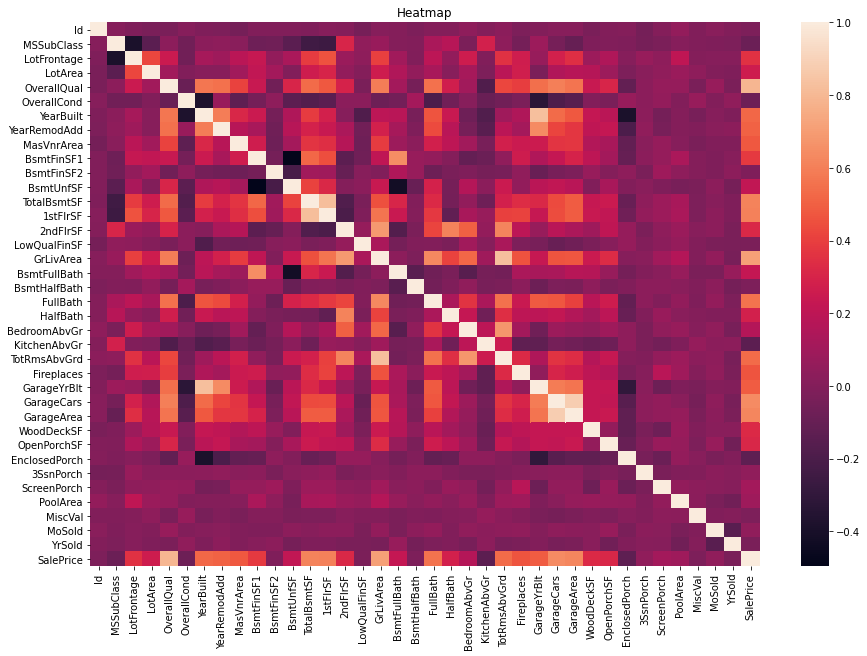

In [ ]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title('Heatmap')


Text(0.5, 1.0, ' New Heatmap')

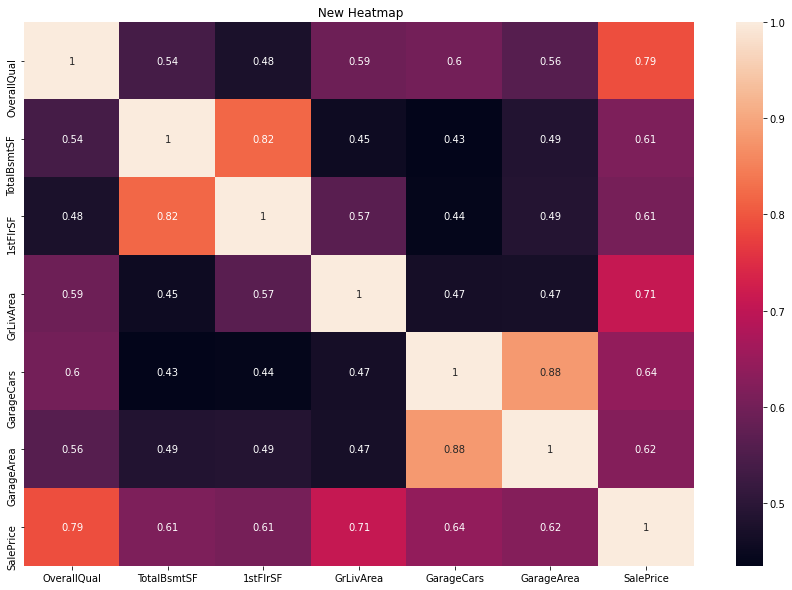

In [ ]:
new_cols = list(corr.SalePrice[(corr.SalePrice > 0.6)].index.values)
new_corr = train[new_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_corr, annot=True,xticklabels=new_corr.columns.values,yticklabels=new_corr.columns.values)
plt.title(' New Heatmap')


Overall Qual, Totalbsmtsf, GrLivArea, garage cars are mostly correlated with sale price. Garage cars, garage Area are proportional. TotalBsmtsf and 1st floor are proportional to each other. We prefer to choose which is having high correlation.




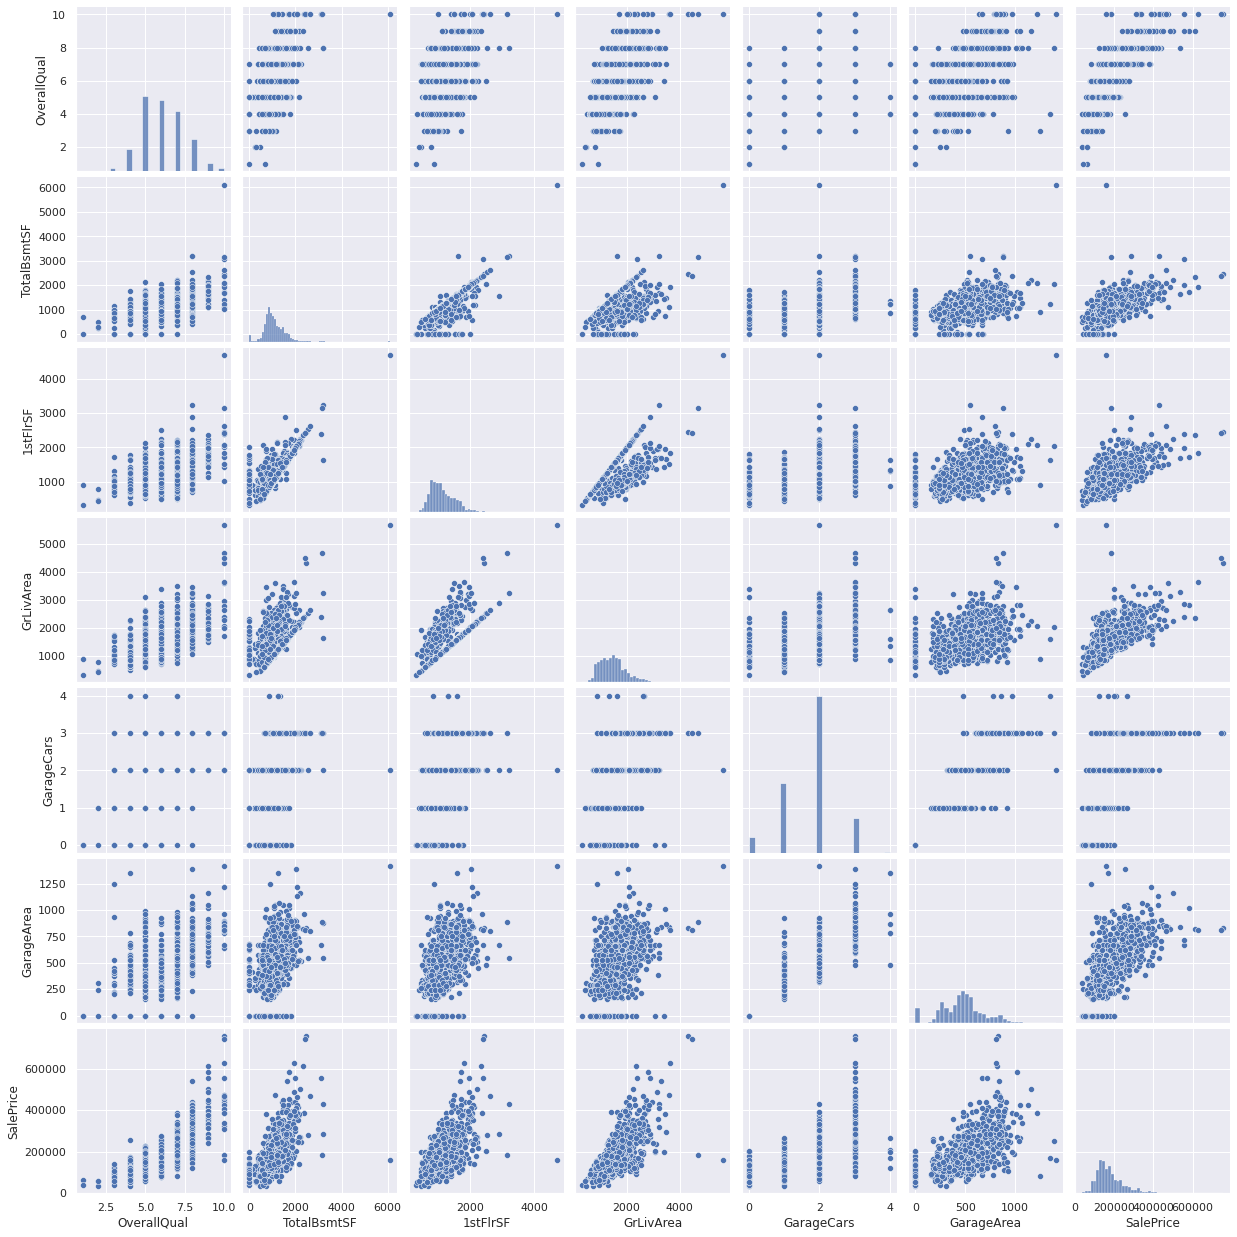

In [ ]:
sns.set()
sns.pairplot(train[new_cols], size=2.5)


we can observe features are changing with sale price

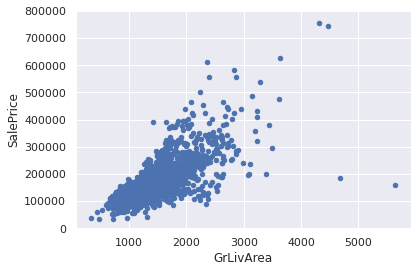

In [ ]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))


sale price and Grliv area are linearly related.

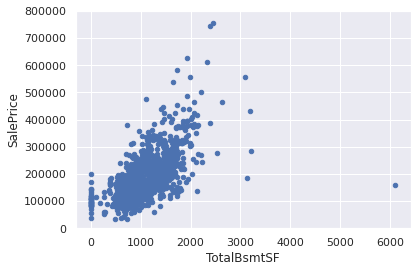

In [ ]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))


They both are linearly related.

(-0.5, 9.5, 0.0, 800000.0)

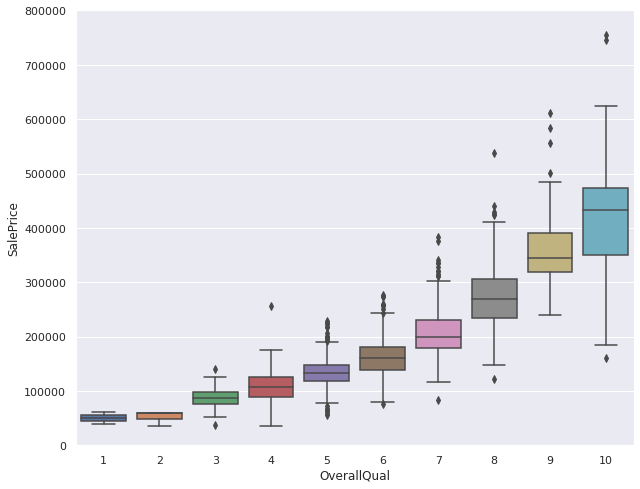

In [ ]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))

fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


If sale price increases, the overallQual also increases. they are directly proportional.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

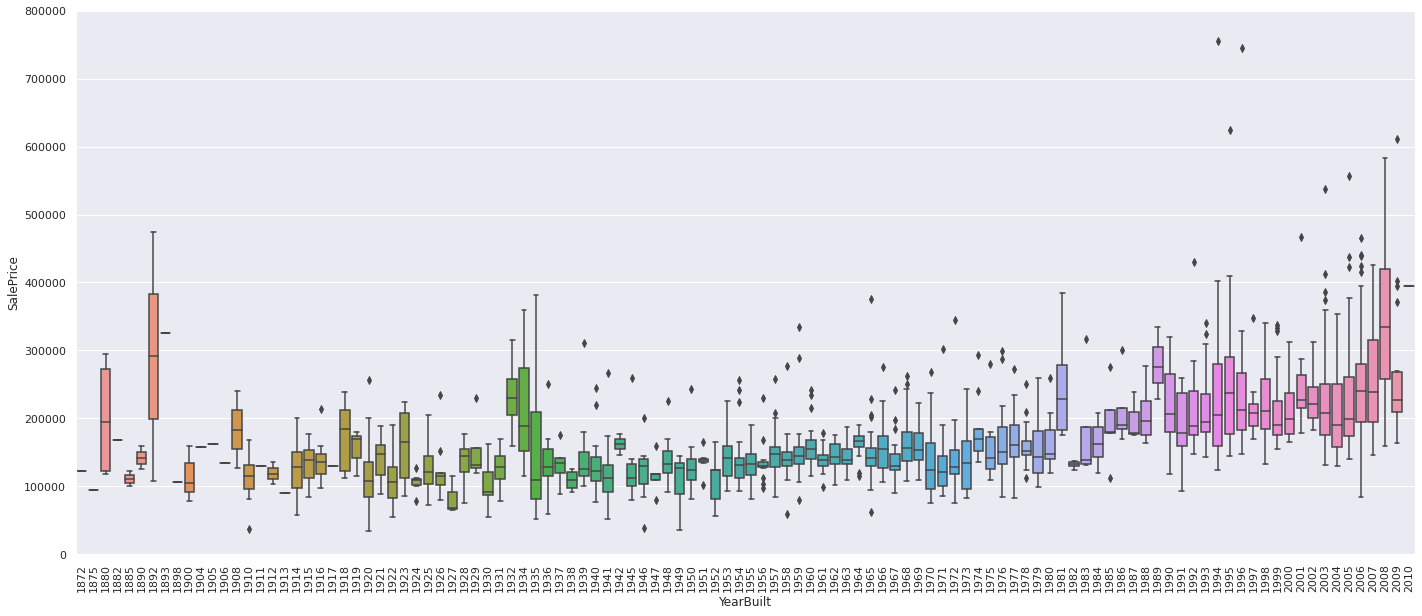

In [ ]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(24, 10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)


They are not much correlated to each other.

In [ ]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('\nouter range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)



outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Text(0.5, 0, 'GrLivArea')

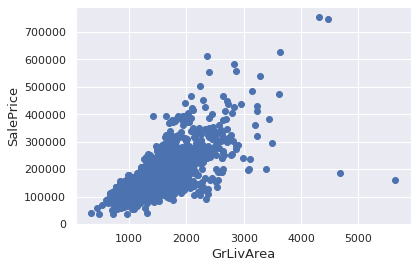

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)


Text(0.5, 0, 'GrLivArea')

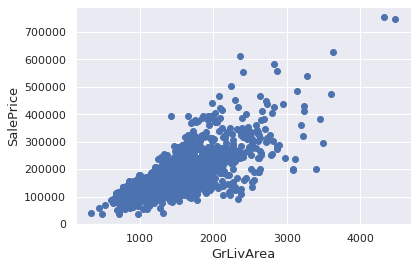

In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)


outliers are removed in the above graph





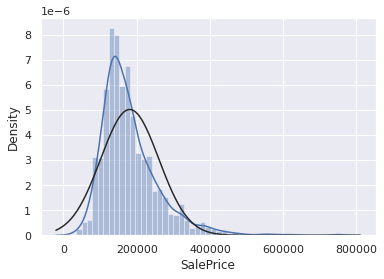

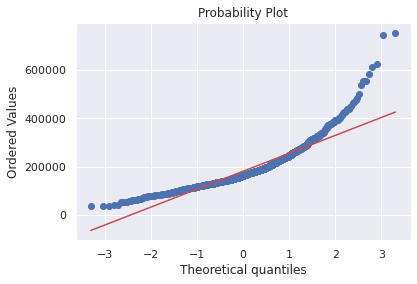

In [ ]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


It is right skewed in the above.


In [ ]:
train['SalePrice'].skew()


1.8812964895244009

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])
train['SalePrice'].skew()


-0.06282472430851055

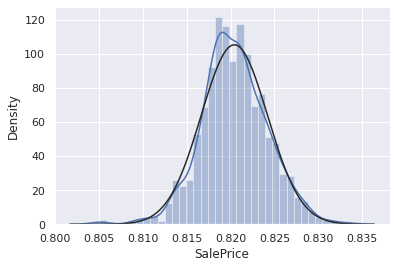

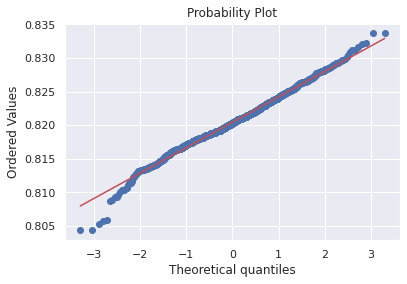

In [ ]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape


(2917, 80)

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Percentage' :all_data_na})
missing_data.head


<bound method NDFrame.head of               Missing Percentage
PoolQC                 99.691464
MiscFeature            96.400411
Alley                  93.212204
Fence                  80.425094
FireplaceQu            48.680151
LotFrontage            16.660953
GarageFinish            5.450806
GarageYrBlt             5.450806
GarageQual              5.450806
GarageCond              5.450806
GarageType              5.382242
BsmtExposure            2.811107
BsmtCond                2.811107
BsmtQual                2.776826
BsmtFinType2            2.742544
BsmtFinType1            2.708262
MasVnrType              0.822763
MasVnrArea              0.788481
MSZoning                0.137127
BsmtFullBath            0.068564
BsmtHalfBath            0.068564
Utilities               0.068564
Functional              0.068564
Exterior2nd             0.034282
Exterior1st             0.034282
SaleType                0.034282
BsmtFinSF1              0.034282
BsmtFinSF2              0.034282
BsmtUnfSF    

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data_all_data = pd.DataFrame({'Missing Percentage' :all_data_na})
missing_data_all_data.head


<bound method NDFrame.head of Empty DataFrame
Columns: [Missing Percentage]
Index: []>

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))


In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data = pd.get_dummies(all_data)
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
y_train = train.SalePrice
from sklearn.linear_model import LinearRegression
LRegression= LinearRegression()
LRegression.fit(X_train, y_train)
LRegression.score(X_train, y_train)


0.9386944458653765

In [ ]:
y_pred = LRegression.predict(X_test)
df = pd.DataFrame({'Predicted Sale value of Houses': y_pred.flatten()})
print(df)




      Predicted Sale value of Houses
0                           0.817504
1                           0.820864
2                           0.821098
3                           0.822116
4                           0.822088
...                              ...
1454                        0.813525
1455                        0.813312
1456                        0.820631
1457                        0.816522
1458                        0.823055

[1459 rows x 1 columns]
